In [38]:
#@title
# import required libraries

import pandas as pd # dataframes
import numpy as np #mathematical operations

# to visualise

import plotly.express as px # plotly
from wordcloud import WordCloud # wordclouds
import matplotlib.pyplot as plt #matplot
import seaborn as sns #seaborn

# preprocessing

import re #Regular expressions
import nltk #NLP library
import spacy
import string
from bs4 import BeautifulSoup #HTML tags
from nltk.corpus import stopwords #english stopwords
#lematising
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Vectorisation

from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

# Treating class imbalanced data

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# model building

from sklearn.model_selection import train_test_split

# algorithms

from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# checking up with models

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
# load your dataframe
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Research/Method 1 - Articles /Preprocessed.csv",index_col=[0])

In [41]:
#observing data frame
df.tail()

,fileclass,content
846,Upskilling,cgd policy paper june mechanism center global ...
847,Upskilling,article learn egyptian high education departme...
848,Upskilling,volume issue july receive accepted publish che...
849,Upskilling,journal communication education volume issue j...
850,Upskilling,sustainability article prepare public pedagogy...


In [42]:
unique_values = df['fileclass'].unique()
print(unique_values)

['ChildProtection' 'Cybersecurity' 'DataPrivacy' 'DataSystemsDevelopment'
 'DigitalFinance' 'DigitalInclusion' 'DigitalInformatioServices'
 'DigitalInfrastructure' 'DigitalLiteracy' 'DigitalServices' 'Egovernment'
 'Upskilling']


In [43]:
# change both types into string
df['content'] = df['content'].astype('str')
df['fileclass'] = df['fileclass'].astype('str')

In [44]:
# Replace childclass value with 1
df.loc[df["fileclass"] == "DigitalInfrastructure", "fileclass"] = 1
df.head(5)

,fileclass,content
0,ChildProtection,trend child sexual abuse material trend child ...
1,ChildProtection,covid remote eliminate female genital mutilati...
2,ChildProtection,journal medium subsequent selfharm followup ch...
3,ChildProtection,original ar sexual exploitation abuse child ph...
4,ChildProtection,covid implication protect child april covid pr...


In [45]:
# Replace other values with 0
df.loc[df["fileclass"] != 1, "fileclass"] = 0

# reorder the dataframe to get DigitalInfrastructure content to appear first
df = df.sort_values(by='fileclass', ascending=False)

df.head(5)

,fileclass,content
585,1,issn lyashenko iryna pidorycheva virtual econo...
558,1,accelerate digitalization critical action resi...
580,1,iraq economic monitor navigate perfect storm r...
581,1,economy southeast asia strengthen foundation f...
582,1,medium communication author reprint permission...


In [46]:
# check if there are duplicates
df.duplicated(subset=['content']).any() #duplicates

True

In [47]:
# remove duplicates, leaving the first record
df = df.drop_duplicates(subset=['content'],keep="first")

In [48]:
# spread of text files after removing duplicates
# Count the number of items per group
group_counts = df.groupby("fileclass").count()
group_counts=group_counts.reset_index()

# Create the bar chart
fig = px.bar(group_counts, x='fileclass', y='content',color="fileclass")

# Show the chart
fig.show()

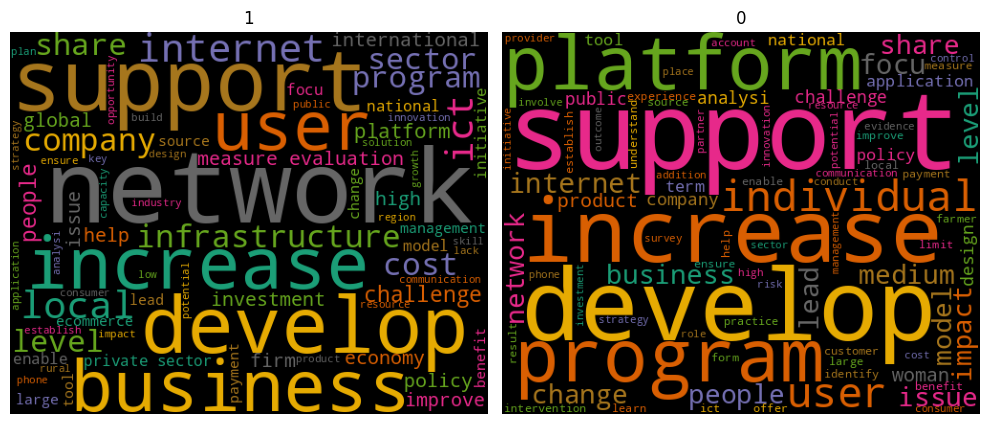

In [49]:
# word clouds based on intervention areas

# Get all the unique classes in the dataset
classes = df['fileclass'].unique()

# Create a figure with 4 subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs = axs.ravel()

# Iterate through each class
for i, class_name in enumerate(classes):
    # Get all the text for the current class
    class_text = df[df['fileclass'] == class_name]['content'].str.cat(sep=' ')
    # Generate the wordcloud
    wordcloud = WordCloud(width = 500, height = 400,
                colormap="Dark2",
                min_font_size = 10).generate(class_text)
    # Plot the wordcloud
    axs[i].imshow(wordcloud)
    axs[i].set_title(f"{class_name}")
    axs[i].axis("off")
fig.tight_layout()
plt.show()

In [50]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
# Filter the dataframe to include only class 0 samples
class_0_df = df[df['fileclass'] == 0]

# Concatenate the text data from class 0 samples into a single string
class_0_text = ' '.join(class_0_df['content'])

# Tokenize and filter the text data from class 0 samples
class_0_tokens = nltk.word_tokenize(class_0_text)

# Count the frequency of each word in class 0
class_0_word_freq = nltk.FreqDist(class_0_tokens)

# Filter the dataframe to include only class 1 samples
class_1_df = df[df['fileclass'] == 1]

# Concatenate the text data from class 1 samples into a single string
class_1_text = ' '.join(class_1_df['content'])

# Tokenize and filter the text data from class 1 samples
class_1_tokens = nltk.word_tokenize(class_1_text)

# Count the frequency of each word in class 1
class_1_word_freq = nltk.FreqDist(class_1_tokens)

# Get the keywords that are common in class 1 but not common in class 0
k = 10  # Specify the desired number of keywords
keywords = []

for word, frequency in class_1_word_freq.items():
    if word in class_0_word_freq:
        if frequency > class_0_word_freq[word]:
            keywords.append((word, frequency))

# Sort the keywords by frequency in descending order
keywords.sort(key=lambda x: x[1], reverse=True)


# Print the top keywords
for keyword, frequency in keywords[:k]:
    print(keyword, frequency)

broadband 1604
port 1014
malaysia 812
spectrum 530
fiber 524
deployment 517
cable 505
burundi 428
qr 391
southeast 381


In [52]:
# vectorsing the content column
vectorizer = TfidfVectorizer(stop_words=None, max_features=300000)
vectorized_df = vectorizer.fit_transform(df['content'])
# defining the y label
y = df['fileclass']
y=y.astype('int')
y=y.to_frame()

In [53]:
keywords= ['broadband','port','spectrum','fiber','cable']

In [54]:
# Create binary features for each keyword
for keyword in keywords:
    df[keyword] = np.where(df['content'].str.contains(keyword), 1, 0)

In [55]:
from scipy.sparse import hstack

# Concatenate the binary features with the vectorized features
X = hstack([vectorized_df, df[keywords].values])

In [56]:
# train test split
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=75)

In [57]:
# treat class imbalanced data
ros = RandomOverSampler(random_state=1500)
X_trainro, Y_trainro = ros.fit_resample(X_train, Y_train)

In [58]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_trainru, Y_trainru = rus.fit_resample(X_train, Y_train)

Random forest

In [59]:
# fit the model
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train, Y_train.values.ravel())

#make predictions
pred_rf = rf.predict(x_test)

#print accuracy
print("Accuracy %s" % accuracy_score(pred_rf,y_test))

Accuracy 0.8864864864864865


In [60]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       165
           1       0.00      0.00      0.00        20

    accuracy                           0.89       185
   macro avg       0.45      0.50      0.47       185
weighted avg       0.79      0.89      0.84       185



Decision Tree

In [61]:
# fit the model
dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train, Y_train.values.ravel())

# make predictions
pred_dt = dt.predict(x_test)

# print accuracy
print("Accuracy %s" % accuracy_score(pred_dt,y_test))

Accuracy 0.8216216216216217


In [62]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       165
           1       0.24      0.30      0.27        20

    accuracy                           0.82       185
   macro avg       0.58      0.59      0.58       185
weighted avg       0.84      0.82      0.83       185



Naive bayes

In [63]:
# fit the model
nb = MultinomialNB()
nb.fit(X_trainro, Y_trainro.values.ravel())

# make predictions
pred_nb = nb.predict(x_test)

# print accuracy
print("Accuracy %s" % accuracy_score(pred_nb,y_test))

Accuracy 0.6486486486486487


In [64]:
print(classification_report(y_test,pred_nb))

              precision    recall  f1-score   support

           0       0.95      0.64      0.76       165
           1       0.20      0.75      0.32        20

    accuracy                           0.65       185
   macro avg       0.58      0.69      0.54       185
weighted avg       0.87      0.65      0.72       185



K-Nearest

In [65]:
# fit the model
knn = KNeighborsClassifier()
knn.fit(X_trainro, Y_trainro.values.ravel())

# make predictions
pred_knn = knn.predict(x_test)

# print accuracy
print("Accuracy %s" % accuracy_score(pred_knn,y_test))

Accuracy 0.7243243243243244


In [66]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.75      0.83       165
           1       0.20      0.50      0.28        20

    accuracy                           0.72       185
   macro avg       0.56      0.63      0.56       185
weighted avg       0.85      0.72      0.77       185



Logistic

In [67]:
# fit the model
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, Y_train.values.ravel())

# make predictions
pred_lr = lr.predict(x_test)

# print accuracy
print("Accuracy %s" % accuracy_score(pred_lr,y_test))

Accuracy 0.8324324324324325


In [68]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       165
           1       0.26      0.30      0.28        20

    accuracy                           0.83       185
   macro avg       0.59      0.60      0.59       185
weighted avg       0.84      0.83      0.84       185



Ada boost

In [69]:
# fit the model
ab = AdaBoostClassifier()
ab.fit(X_trainro, Y_trainro.values.ravel())

# make predictions
pred_ab = ab.predict(x_test)

# print accuracy
print("Accuracy %s" % accuracy_score(pred_ab,y_test))

Accuracy 0.8702702702702703


In [70]:
print(classification_report(y_test,pred_ab))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       165
           1       0.33      0.20      0.25        20

    accuracy                           0.87       185
   macro avg       0.62      0.58      0.59       185
weighted avg       0.85      0.87      0.86       185



SGD

In [71]:
# fit the model
sgd = SGDClassifier(class_weight='balanced')
sgd.fit(X_train, Y_train.values.ravel())

# make predictions
pred_sgd = sgd.predict(x_test)

# print accuracy
print("Accuracy %s" % accuracy_score(pred_sgd,y_test))

Accuracy 0.8810810810810811


In [72]:
print(classification_report(y_test,pred_sgd))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       165
           1       0.33      0.10      0.15        20

    accuracy                           0.88       185
   macro avg       0.62      0.54      0.54       185
weighted avg       0.84      0.88      0.85       185



Support Vector

In [73]:
# fit the model
svc = SVC(class_weight='balanced')
svc.fit(X_train, Y_train.values.ravel())

# make predictions
pred_svc = svc.predict(x_test)

# print accuracy
print("Accuracy %s" % accuracy_score(pred_svc,y_test))

Accuracy 0.8594594594594595


In [74]:
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       165
           1       0.29      0.20      0.24        20

    accuracy                           0.86       185
   macro avg       0.60      0.57      0.58       185
weighted avg       0.84      0.86      0.85       185



In [75]:
from sklearn.ensemble import VotingClassifier

# Create instances of the SGDClassifier and RandomForestClassifier
sgd = SGDClassifier()
nb = MultinomialNB()

# Create an instance of the VotingClassifier
ensemble = VotingClassifier(estimators=[('sgd', sgd), ('nb', nb)], voting='hard')

# Fit the VotingClassifier to the data
ensemble.fit(X_trainro, Y_trainro.values.ravel())

# Make predictions
pred_ensemble = ensemble.predict(x_test)

# Print accuracy
print("Accuracy %s" % accuracy_score(pred_ensemble, y_test))



Accuracy 0.8216216216216217


In [76]:
print(classification_report(y_test,pred_ensemble))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       165
           1       0.24      0.30      0.27        20

    accuracy                           0.82       185
   macro avg       0.58      0.59      0.58       185
weighted avg       0.84      0.82      0.83       185



Hyperparameter tuning


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
              'loss': ['hinge', 'log', 'squared_hinge', 'perceptron']}

# Create an instance of the SGDClassifier
sgd = SGDClassifier(class_weight='balanced')

# Create an instance of the GridSearchCV
grid_search = GridSearchCV(sgd, param_grid, cv=5)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, Y_train.values.ravel())

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

In [78]:
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'alpha': 0.0001, 'loss': 'log'}


In [79]:
# fit the model
sgdh = SGDClassifier(class_weight='balanced',alpha=0.001,loss='squared_hinge')
sgdh.fit(X_train, Y_train.values.ravel())

SGDClassifier(alpha=0.001, class_weight='balanced', loss='squared_hinge')

In [80]:
# make predictions on train set
pred_train = sgdh.predict(X_train)

# check for accuacy
print("Accuracy of training data set %s" % accuracy_score(pred_train,Y_train))

Accuracy of training data set 1.0


much better before tuning hyper parameters

In [81]:
# make predictions test set
pred_sgdh = sgdh.predict(x_test)

# print accuracy
print("Accuracy of testing data set %s" % accuracy_score(pred_sgdh,y_test))
# get classification report
print(classification_report(y_test,pred_sgdh))

Accuracy of testing data set 0.8810810810810811
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       165
           1       0.38      0.15      0.21        20

    accuracy                           0.88       185
   macro avg       0.64      0.56      0.57       185
weighted avg       0.85      0.88      0.86       185



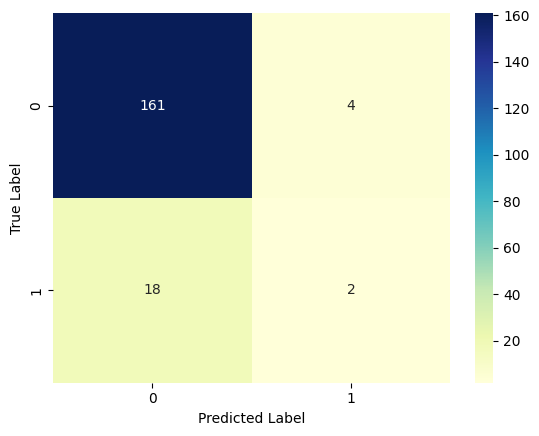

In [82]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, pred_sgd)

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "YlGnBu")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

User case

In [83]:
def predict_class(text, model, vectorizer):
    text=preprocess(text)
    # Transform the input text using the fitted vectorizer
    text_vector = vectorizer.transform([text])
    # Use the trained model to predict the class
    prediction = model.predict(text_vector)[0]
    return prediction

In [ ]:
# Example usage
text = input("Enter text to classify: ")

In [ ]:
# predict the class of input document
predicted_class = predict_class(text, sgdh, vectorizer)
print("The predicted class is: ", predicted_class)

In [ ]:
from joblib import Parallel, delayed
import joblib

# Save the model as a pickle in a file
joblib.dump(sgd, '/content/drive/MyDrive/Colab Notebooks/Research/digitalinfra.pkl')